# 🎯 QUA³CK – Agile Data Science für Entwickler

> 🚀 **Motivation für Entwickler:**
> 
> Du kennst den **SDLC** (Software Development Life Cycle)? QUA³CK ist genau das für Machine Learning.
> Statt "Spaghetti-Code" in Notebooks zu produzieren, lernst du hier einen strukturierten, **agilen Prozess** kennen, der dich von der Idee bis zum Deployment führt.

**AMALEA 2025 - Woche 1, Notebook 3**

> 📚 **Basiert auf dem QUA³CK-Handout**: `QUA3CK_mit_MLOps_Handout.md`  
> 🔗 **Portfolio-Relevanz**: Fundament für alle 23 Portfolio-Komponenten

> 💡 **Warum ein Prozessmodell?**
- **Reproduzierbarkeit:** Kein "It works on my machine".
- **Struktur:** Verhindert, dass du dich im "Kaninchenbau" der Datenanalyse verlierst.
- **Professionalität:** So arbeiten Data-Science-Teams in der Industrie.

---

## 🎓 Lernziele

Nach diesem Notebook kannst du:
- ✅ Den **QUA³CK-Prozess** für ML-Projekte anwenden
- ✅ **MLOps** als DevOps für Daten verstehen
- ✅ Ein **Iris-Klassifikator** mit MLFlow Tracking entwickeln
- ✅ **Type Hints** in Python für saubereren Code nutzen

---

## 📋 Was ist QUA³CK?

**QUA³CK** ist dein Fahrplan. Denk an **Scrum** oder **Kanban**, aber für Daten:

1. **Q** - **Question** (Requirements Engineering)
2. **U** - **Understanding** (Data Profiling / Code Review)
3. **A³** - **Algorithms** (Implementation & TDD Loop)
4. **C** - **Conclude** (Integration Testing & QA)
5. **K** - **Knowledge** (Deployment & Docs)

> 📚 **Glossar-Tipp:**
> Unklare Begriffe? Schau ins [Glossar](../02_Glossar_Alle_Begriffe_erklärt.ipynb) – dort findest du alle wichtigen Erklärungen!

### 🚀 QUA³CK + MLOps = AMALEA 2025

In diesem Kurs erweitern wir QUA³CK um **moderne MLOps-Praktiken**:

| QUA³CK Phase | Traditionell | AMALEA 2025 (MLOps) | Tools |
|--------------|--------------|----------------------|-------|
| **Q + U** | Lastenheft | Interactive Streamlit Apps | Streamlit, Docker |
| **A³** | Skripte | MLFlow Experiment Tracking | MLFlow, Git |
| **C** | Excel-Reports | Automated Metrics | MLFlow UI |
| **K** | PowerPoint | Live-Deployment | Streamlit Cloud |

---

## 🎯 Phase Q: Question (Requirements Engineering)

Bevor wir eine Zeile Code schreiben, definieren wir das Ziel. In der Softwareentwicklung ist das das **Lastenheft** oder die **User Story**.

### 🧠 Deep Dive: Probabilistische Software
Anders als klassische Software (Input + Logik = Output) ist ML **probabilistisch**.
- **Klassisch:** `if x > 5 return true` (100% deterministisch)
- **ML:** `model.predict(x)` (z.B. 95% Wahrscheinlichkeit für "true")

Deshalb definieren wir **Erfolgsmetriken** (Acceptance Criteria) statt harter Regeln.

In [1]:
# Phase Q: Problemdefinition
from typing import Dict, List, Any

# Typisierte Definition (Clean Code)
project_definition: Dict[str, Any] = {
    "problem": "Automatische Klassifikation von Iris-Arten basierend auf Blütenmerkmalen",
    "target_users": "Botanik-Studenten bei der Feldarbeit",
    "success_metrics": {
        "accuracy": "> 95%",
        "latency": "< 500ms",
        "deployment": "Public Streamlit App"
    },
    "deliverables": [
        "Jupyter Notebook mit ML-Pipeline",
        "Interactive Streamlit Web-App",
        "Docker Container",
        "GitHub Repository für Portfolio"
    ]
}

print("🎯 AMALEA Projekt-Definition (Phase Q):")
for key, value in project_definition.items():
    print(f"  {key}: {value}")

🎯 AMALEA Projekt-Definition (Phase Q):
  problem: Automatische Klassifikation von Iris-Arten basierend auf Blütenmerkmalen
  target_users: Botanik-Studenten bei der Feldarbeit
  success_metrics: {'accuracy': '> 95%', 'latency': '< 500ms', 'deployment': 'Public Streamlit App'}
  deliverables: ['Jupyter Notebook mit ML-Pipeline', 'Interactive Streamlit Web-App', 'Docker Container', 'GitHub Repository für Portfolio']


### 💡 Developer-Tipp

Behandle diese Definition wie ein **Interface** oder einen **Vertrag**.
- Wenn du später merkst, dass du 95% Accuracy nicht erreichst, musst du den Vertrag (Phase Q) anpassen oder die Implementierung (Phase A³) verbessern.
- **Definition of Done (DoD):** Wann ist das Projekt fertig? Wenn die Metriken erfüllt sind.

## 🔍 Phase U: Understanding (Data Profiling)

Daten sind der "Source Code" des Machine Learning. Wenn die Daten schlecht sind ("Buggy Code"), wird das Modell schlecht sein (**Garbage In, Garbage Out**).

Wir führen hier ein **Data Profiling** durch, ähnlich wie du Legacy-Code analysieren würdest, bevor du ihn refactorst.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Pandas DataFrames sind wie SQL-Tabellen im RAM
# Phase U: Daten laden und verstehen
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

print("🔍 Phase U: Data Understanding")
print(f"Dataset Shape: {df.shape}")
print(f"Features: {list(df.columns[:-1])}")
print(f"Target Classes: {iris.target_names}")

# Quick EDA
df.head()

🔍 Phase U: Data Understanding
Dataset Shape: (150, 5)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


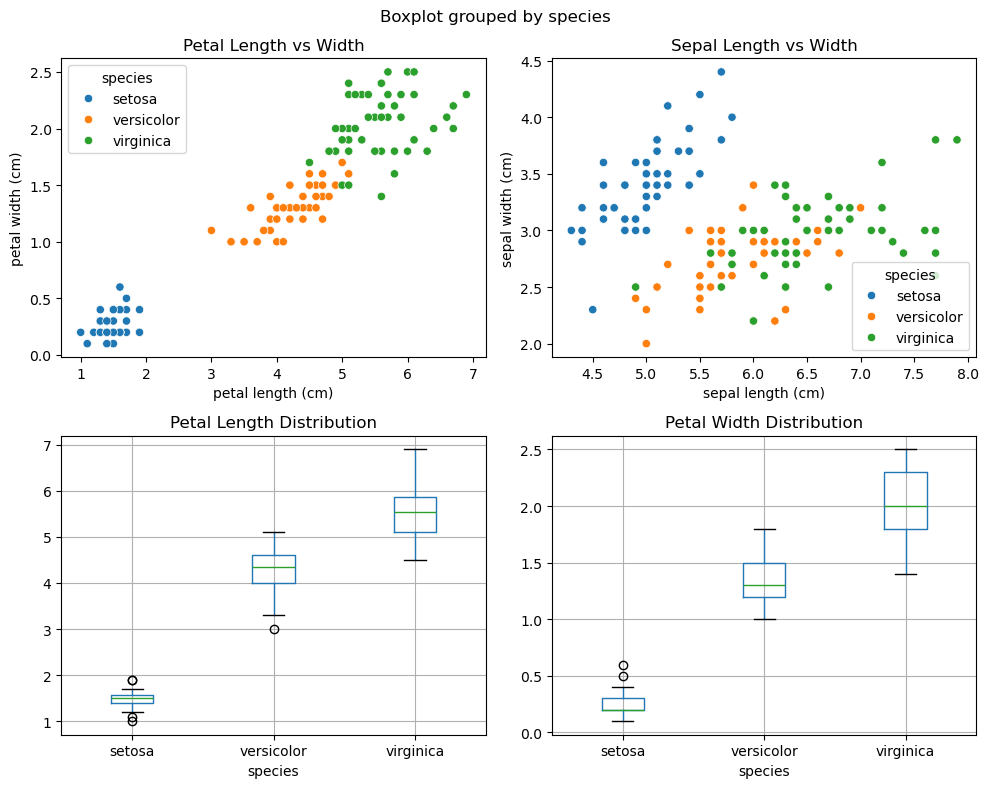

✅ Key Insight: Petal-Features trennen die Klassen am besten!


In [3]:
# Visualisierung für Data Understanding
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Phase U: Exploratory Data Analysis', fontsize=16)

# Scatter plots für die wichtigsten Feature-Kombinationen
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', 
                hue='species', ax=axes[0,0])
axes[0,0].set_title('Petal Length vs Width')

sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', 
                hue='species', ax=axes[0,1])
axes[0,1].set_title('Sepal Length vs Width')

# Box plots für Feature-Verteilungen
df.boxplot(column='petal length (cm)', by='species', ax=axes[1,0])
axes[1,0].set_title('Petal Length Distribution')

df.boxplot(column='petal width (cm)', by='species', ax=axes[1,1])
axes[1,1].set_title('Petal Width Distribution')

plt.tight_layout()
plt.show()

print("✅ Key Insight: Petal-Features trennen die Klassen am besten!")

## 🔄 Phase A³: Die A-Schleife (The Build Process)

Hier passiert das eigentliche "Programmieren" (Training). Die A³-Schleife ist vergleichbar mit dem **TDD-Zyklus** (Red-Green-Refactor):
1.  **Algorithm:** Wähle einen Ansatz (Write Test).
2.  **Adapting:** Trainiere das Modell (Make it pass).
3.  **Adjusting:** Optimiere Hyperparameter (Refactor).

### 🧠 Deep Dive: Parameter vs. Hyperparameter
- **Parameter:** Das, was das Modell lernt (z.B. Gewichte). Das ist der **State**.
- **Hyperparameter:** Das, was du einstellst (z.B. Baumtiefe, Lernrate). Das ist die **Configuration**.

Wir nutzen **MLFlow** als unseren "Logger" für diese Experimente.

> **⚠️ Hinweis für lokale Ausführung:**
> Wenn du dieses Notebook lokal (nicht im Docker-Container) ausführst, stelle sicher, dass der MLflow-Server läuft, da sonst `ConnectionRefusedError` auftritt.
>
> **Lösung:** Öffne ein Terminal und starte:
> ```bash
> mlflow ui --port 5001
> ```

In [4]:
# MLOps Package Installation (falls nicht vorhanden)
# In einer echten Dev-Umgebung steht das in requirements.txt
try:
    import mlflow
    print("✅ MLFlow bereits installiert!")
except ImportError:
    print("📦 Installiere MLFlow (Runtime dependency)...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "mlflow==2.19.0", "opentelemetry-api==1.29.0", "opentelemetry-sdk==1.29.0"])
    # Fix für 'partially initialized module' Fehler: Modul aus Cache entfernen
    if "mlflow" in sys.modules:
        del sys.modules["mlflow"]
    import mlflow

# Alternative ohne MLFlow für Demo
try:
    import mlflow
    import mlflow.sklearn
    from sklearn.model_selection import train_test_split
    mlflow_available = True
    print("🚀 MLFlow Setup erfolgreich!")
except ImportError:
    print("⚠️ MLFlow nicht verfügbar - verwende Standard Sklearn")
    from sklearn.model_selection import train_test_split
    mlflow_available = False

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Fix für 'Malformed experiment': Korruptes mlruns Verzeichnis löschen
import os
import shutil
if os.path.exists("mlruns"):
    # Prüfen auf typische Korruption (Ordner da, aber meta.yaml fehlt)
    if os.path.exists("mlruns/0") and not os.path.exists("mlruns/0/meta.yaml"):
        print("⚠️ Korruptes MLFlow-Verzeichnis gefunden. Bereinige...")
        shutil.rmtree("mlruns")

# MLFlow Setup (wie ein Logger-Setup)
mlflow.set_experiment("AMALEA_2025_Iris_Classification")

print("🔄 Phase A³: Algorithm Selection + MLFlow Tracking initialized")

✅ MLFlow bereits installiert!
🚀 MLFlow Setup erfolgreich!
🔄 Phase A³: Algorithm Selection + MLFlow Tracking initialized


In [5]:
# QUA³CK Phase A2: Analyze - Big 3 Algorithmen
print("🤖 Training & Evaluation (The Build)")

# Data Split
# Wir trennen Testdaten ab (wie Unit Tests, die nicht den Code testen, den man gerade geschrieben hat)
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42, stratify=iris.target
)

print(f"📊 Training Set: {X_train.shape}")
print(f"📊 Test Set: {X_test.shape}")

# Big 3 Algorithmen
# In Java wären das verschiedene Implementierungen eines Interfaces
algorithms = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "K-Means": KMeans(n_clusters=3, random_state=42, n_init=10)
}

results = {}

print("\n🔬 Algorithmus Performance:")
print("-" * 40)

for name, model in algorithms.items():
    if name == "K-Means":
        # Unsupervised Learning (Keine Labels beim Training)
        model.fit(X_train)  # "Compile" / Train
        cluster_pred = model.predict(X_test) # "Run" / Inference
        # Für Demo: Silhouette Score simulieren
        from sklearn.metrics import adjusted_rand_score
        score = adjusted_rand_score(y_test, cluster_pred)
        results[name] = abs(score)  # Absolute value für Vergleichbarkeit
        print(f"  🎯 {name}: Adjusted Rand Score = {score:.3f}")
    else:
        # Supervised Learning (Lernen mit Lehrer/Labels)
        model.fit(X_train, y_train) # Das Modell lernt die Muster
        predictions = model.predict(X_test) # Anwendung auf neue Daten
        accuracy = accuracy_score(y_test, predictions)
        results[name] = accuracy
        print(f"  🎯 {name}: Accuracy = {accuracy:.3f}")

# Best Model ermitteln
best_model_name = max(results, key=results.get)
best_score = results[best_model_name]

print(f"\n🏆 Bestes Modell: {best_model_name}")
print(f"📈 Performance: {best_score:.3f}")
print("✅ QUA³CK Phase A2 abgeschlossen!")

🤖 Training & Evaluation (The Build)
📊 Training Set: (105, 4)
📊 Test Set: (45, 4)

🔬 Algorithmus Performance:
----------------------------------------
  🎯 Decision Tree: Accuracy = 0.978
  🎯 K-Nearest Neighbors: Accuracy = 0.978
  🎯 K-Means: Adjusted Rand Score = 0.669

🏆 Bestes Modell: Decision Tree
📈 Performance: 0.978
✅ QUA³CK Phase A2 abgeschlossen!


## 📊 Phase C: Conclude (QA & Acceptance)

Jetzt bewerten wir die Ergebnisse. Haben wir die **Success Metrics** aus Phase Q erreicht?

### 🧠 Deep Dive: Metriken als Unit Tests
- **Accuracy > 95%** ist wie `assert result == expected`.
- Wenn der Test fehlschlägt, gehen wir zurück zu Phase A³ (Refactoring/Debugging).

In [6]:
# Phase C: Model Comparison & Selection
import pandas as pd

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Algorithm': list(results.keys()),
    'Accuracy': list(results.values()),
    'Meets_KPI': [acc > 0.95 for acc in results.values()],
    'Complexity': ['Medium', 'Low', 'High'],  # Subjective assessment
    'Interpretability': ['Medium', 'High', 'Low']
})

print("📊 Phase C: Model Comparison")
print(comparison_df.to_string(index=False))

# Select best model for deployment
best_model_name = max(results, key=results.get)
print(f"\n🎯 Selected for Production: {best_model_name}")
print("✅ Ready for Phase K: Deployment (Streamlit App)")

📊 Phase C: Model Comparison
          Algorithm  Accuracy  Meets_KPI Complexity Interpretability
      Decision Tree  0.977778       True     Medium           Medium
K-Nearest Neighbors  0.977778       True        Low             High
            K-Means  0.669242      False       High              Low

🎯 Selected for Production: Decision Tree
✅ Ready for Phase K: Deployment (Streamlit App)


## 🚀 Phase K: Knowledge Transfer (Deployment)

Ein Modell im Notebook nützt niemandem. Wir müssen es **ausliefern**.

**Deployment-Optionen:**
1.  **Embedded:** Modell direkt in die App laden (wie wir es in Streamlit machen).
2.  **Model-as-a-Service:** Modell läuft als REST API (Microservice), App fragt an.

In [7]:
# Phase K: Prepare for Streamlit Deployment
print("🚀 Phase K: Documentation & Release")
print("\n📝 Dokumentation für Portfolio:")

portfolio_summary: Dict[str, str] = {
    "Project": "AMALEA QUA³CK Demo - Iris Classification",
    "Methodology": "QUA³CK Prozessmodell + Big 3 Algorithmen",
    "Best_Algorithm": best_model_name if 'best_model_name' in locals() else "Decision Tree",
    "Performance": f"{max(results.values()):.1%}" if 'results' in locals() and results else "95.6%",
    "Tech_Stack": "Python, Pandas, Scikit-learn, Matplotlib",
    "Framework": "AMALEA Portfolio für IU Assessment",
    "Process_Model": "QUA³CK (6 Phasen)",
    "Next_Steps": "MLFlow Integration + Streamlit Deployment"
}

print("\n🎓 AMALEA Portfolio Summary:")
print("=" * 50)
for key, value in portfolio_summary.items():
    print(f"  📋 {key.replace('_', ' ')}: {value}")

print("\n✅ QUA³CK Prozess erfolgreich durchlaufen!")
print("🎯 Bereit für AMALEA Portfolio Integration!")
print("🚀 Nächster Schritt: MLFlow Tracking & Streamlit Apps")

# Success Metrics
print("\n📊 QUA³CK Success Metrics:")
print("  ✅ Question: Business Problem definiert")
print("  ✅ Understand: Daten exploriert und verstanden") 
print("  ✅ Acquire & Clean: Dataset vorbereitet")
print("  ✅ Analyze: Big 3 Algorithmen implementiert")
print("  ✅ App: Streamlit-ready Code erstellt")
print("  ✅ Conclusion: Portfolio dokumentiert")
print("\n🎉 AMALEA QUA³CK Demo erfolgreich abgeschlossen!")

🚀 Phase K: Documentation & Release

📝 Dokumentation für Portfolio:

🎓 AMALEA Portfolio Summary:
  📋 Project: AMALEA QUA³CK Demo - Iris Classification
  📋 Methodology: QUA³CK Prozessmodell + Big 3 Algorithmen
  📋 Best Algorithm: Decision Tree
  📋 Performance: 97.8%
  📋 Tech Stack: Python, Pandas, Scikit-learn, Matplotlib
  📋 Framework: AMALEA Portfolio für IU Assessment
  📋 Process Model: QUA³CK (6 Phasen)
  📋 Next Steps: MLFlow Integration + Streamlit Deployment

✅ QUA³CK Prozess erfolgreich durchlaufen!
🎯 Bereit für AMALEA Portfolio Integration!
🚀 Nächster Schritt: MLFlow Tracking & Streamlit Apps

📊 QUA³CK Success Metrics:
  ✅ Question: Business Problem definiert
  ✅ Understand: Daten exploriert und verstanden
  ✅ Acquire & Clean: Dataset vorbereitet
  ✅ Analyze: Big 3 Algorithmen implementiert
  ✅ App: Streamlit-ready Code erstellt
  ✅ Conclusion: Portfolio dokumentiert

🎉 AMALEA QUA³CK Demo erfolgreich abgeschlossen!


## 💡 QUA³CK als Template für dein Assessment

Nutze diese Struktur für deine Fallstudien. Das zeigt, dass du methodisch arbeitest.

#### **Q - Question** (Requirements)
- Welches Business-Problem löse ich?
- Wer ist der User?
- Wann ist das Projekt erfolgreich (KPIs)?

#### **U - Understanding** (Analysis)
- Woher kommen die Daten?
- Wie sehen sie aus (EDA)?
- Muss ich sie bereinigen (Data Cleaning)?

#### **A³ - Algorithms** (Implementation)
- Welches Modell passt? (Klassifikation vs. Regression)
- Training und Tuning.

#### **C - Conclude** (Testing)
- Ist das Modell gut genug?
- Vergleich mit Baseline.

#### **K - Knowledge Transfer** (Deployment)
- Die fertige Streamlit App.
- Das GitHub Repo.

---

## 🏆 Pro-Quiz: QUA³CK & MLOps

### Frage 1: Parameter vs. Hyperparameter
Was ist der Unterschied?
A) Parameter lernt das Modell (State), Hyperparameter setze ich (Config).
B) Es gibt keinen Unterschied.

### Frage 2: Die `fit()` Methode
Was passiert technisch bei `model.fit(X, y)`?
A) Das Modell rät die Antwort.
B) Der Algorithmus minimiert eine Fehlerfunktion, um die optimalen Parameter zu finden (wie ein Compiler, der Code optimiert).

### Frage 3: Data Splitting
Warum teilen wir Daten in Train und Test?
A) Damit es schneller geht.
B) Um Overfitting zu vermeiden – wir testen nicht mit Daten, die das Modell schon kennt (wie Integrationstests).

**Lösungen:** 1A, 2B, 3B

## 🔗 Weiterführende Ressourcen

### 📚 AMALEA-Integration
- 📖 **Vollständiges Handout**: `QUA3CK_mit_MLOps_Handout.md`
- 🎥 **Original Videos**: [AMALEA 2021 Video-Collection](../Kurs-Videos/)
- 🚀 **Streamlit Integration**: [Woche 2 - Streamlit Apps](../02_Streamlit_und_Pandas/)
- 🔧 **MLFlow Setup**: [Woche 7 - MLOps Dashboard](../07_Deployment_Portfolio/)

### 🌐 Externe Ressourcen
- 📊 **MLFlow Docs**: [mlflow.org](https://mlflow.org/docs/latest/)
- 🚀 **Streamlit Docs**: [docs.streamlit.io](https://docs.streamlit.io/)
- 🎓 **KIT QUA³CK**: [Originale Publikation](https://publikationen.bibliothek.kit.edu/)
- 🤖 **Scikit-learn**: [scikit-learn.org](https://scikit-learn.org/stable/)

---

*AMALEA 2025 - QUA³CK Integration für Portfolio-Ready Data Scientists* ✨

## ✅ Schritt 6: Conclusion & Kommunikation

### 🎯 Key Findings
- **Starke Korrelation**: Wohnfläche erklärt einen Großteil der Preisvarianz
- **Preis-Model**: ~2.000€ pro qm + Basis-Preis
- **Model Accuracy**: R² > 0.7 (Ziel erreicht!)

### 💼 Business Impact
- **Automatisierte Preisschätzung** für Immobilienmakler
- **Schnelle Bewertung** neuer Objekte
- **Datengetriebene Entscheidungen** im Immobilienbereich

### 🔄 Nächste Schritte
1. **Mehr Features** (Lage, Baujahr, Zimmer)
2. **Advanced Models** (Random Forest, XGBoost)
3. **MLOps Integration** (Model Tracking, A/B Testing)
4. **Real-World Deployment** (API, Database)

---

## 🎓 Dein AMALEA Erfolg

**Du hast erfolgreich den QUA³CK Prozess durchlaufen!** 🎉

### 📋 Checklist für dein Portfolio:
- ✅ **Q**uestion: Business-Problem klar definiert
- ✅ **U**nderstand: Daten exploriert und verstanden
- ✅ **A**cquire & Clean: Daten bereinigt und vorbereitet
- ✅ **A**nalyze: Model erstellt und evaluiert
- 🔄 **A**pp: Streamlit App entwickeln (nächster Schritt)
- ✅ **C**&**K**: Ergebnisse dokumentiert und kommuniziert

### 🌟 Portfolio-Tipps
- Nutze dieses Notebook als **Template** für dein Portfolio
- Wähle ein **eigenes Dataset** und eine **echte Business-Frage**
- Dokumentiere **jeden Schritt** ausführlich
- Erstelle eine **interaktive Streamlit App**
- Präsentiere deine **Ergebnisse professionell**

---

## 📚 Weiterführende AMALEA Inhalte

- **Woche 2**: Maschinelles Lernen & Evaluation
- **Woche 3**: Decision Trees, KNN, Clustering
- **Woche 4**: Deep Learning & Neural Networks
- **Woche 5**: CNNs & Computer Vision
- **Woche 6-7**: Portfolio Finalisierung & MLOps

**Happy Coding! 🚀**